# Tutorial 4, Question 3

In [1]:
import torch
from torch import nn

import numpy as np
import matplotlib.pylab as plt

In [2]:
device = (
    "cuda" if torch.cuda.is_available()
    else "mps"  # macbook uses metal performance shaders to GPU accelearation
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


## Set learning parameters

In [3]:
lr = 0.01
no_epochs = 3000

seed = 100
np.random.seed(seed)
torch.manual_seed(seed)

## Generate training data

In [4]:
X = np.zeros((9*9, 2)).astype(np.float32)
p = 0
for i in np.arange(-1, 1.001, 0.25):
    for j in np.arange(-1, 1.001, 0.25):
        X[p] = [i, j]
        p += 1

np.random.shuffle(X)
Y = np.zeros((9*9, 1)).astype(np.float32)
Y[:,0] = 0.8*X[:,0]**2 - X[:,1]**3 + 2.5*X[:,0]*X[:,1]

## Plot training inputs

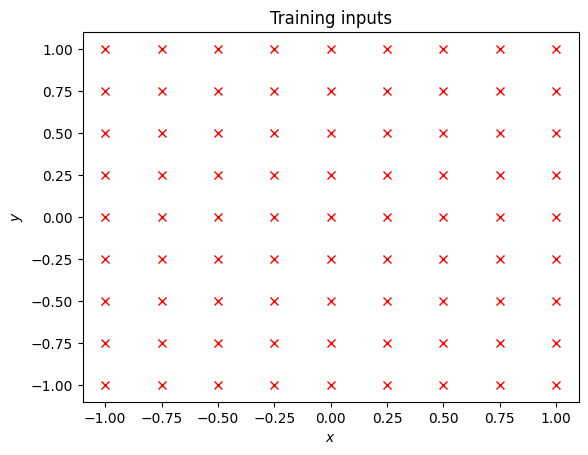

In [5]:
plt.figure(1)
plt.plot(X[:,0], X[:,1], 'rx')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Training inputs')
plt.show()

## Plot targets

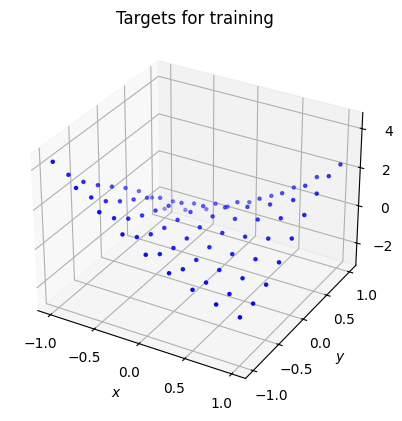

In [6]:
fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], color='blue', marker='.')
ax.set_title('Targets for training')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel(r'$\phi$, fontsize=16, color='r'')
ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_zticks([-2, 0, 2, 4])
plt.show()

## Build the neural network

In [7]:
class FFN(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu_stack = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1),
        )

    def forward(self, x):
        logits = self.relu_stack(x)
        return logits

## Set the optimizer, cost, measures, etc. for learning

In [8]:
def train_loop(X, Y, model, loss_fn, optimizer):
    
    pred = model(X)
    loss = loss_fn(pred, Y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    return loss.item() # return loss as a standard python item

## Learn the model

In [9]:
model = FFN().to(device)

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param} \n")

Model structure: FFN(
  (relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)


Layer: relu_stack.0.weight | Size: torch.Size([10, 2]) | Values : Parameter containing:
tensor([[-0.5492,  0.4467],
        [-0.3358, -0.0228],
        [ 0.2496,  0.3591],
        [-0.3356, -0.6465],
        [-0.4129, -0.5402],
        [-0.5350,  0.3332],
        [ 0.2995,  0.4067],
        [-0.1155,  0.5677],
        [ 0.7027,  0.3628],
        [-0.3905, -0.2795]], device='mps:0', requires_grad=True) 

Layer: relu_stack.0.bias | Size: torch.Size([10]) | Values : Parameter containing:
tensor([-0.4548,  0.4580,  0.0788,  0.6746, -0.0792,  0.6333,  0.3458, -0.0153,
        -0.3641,  0.2833], device='mps:0', requires_grad=True) 

Layer: relu_stack.2.weight | Size: torch.Size([5, 10]) | Values : Parameter containing:
tensor([[ 0

In [10]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

train_loss_ = []

for epoch in range(no_epochs):
    train_loss = train_loop(torch.tensor(X, device=device), torch.tensor(Y, device=device), model, loss_fn, optimizer)
    
    train_loss_.append(train_loss)
    
    if epoch%100 == 99:
        print(f"Epoch {epoch+1}, train_loss {train_loss:>7f}")
print("Done!")

Epoch 100, train_loss 1.077621
Epoch 200, train_loss 0.685397
Epoch 300, train_loss 0.282566
Epoch 400, train_loss 0.122979
Epoch 500, train_loss 0.091842
Epoch 600, train_loss 0.079814
Epoch 700, train_loss 0.071622
Epoch 800, train_loss 0.065584
Epoch 900, train_loss 0.059851
Epoch 1000, train_loss 0.055992
Epoch 1100, train_loss 0.052384
Epoch 1200, train_loss 0.049310
Epoch 1300, train_loss 0.046730
Epoch 1400, train_loss 0.043999
Epoch 1500, train_loss 0.041082
Epoch 1600, train_loss 0.038509
Epoch 1700, train_loss 0.036332
Epoch 1800, train_loss 0.034131
Epoch 1900, train_loss 0.032260
Epoch 2000, train_loss 0.030715
Epoch 2100, train_loss 0.029255
Epoch 2200, train_loss 0.027912
Epoch 2300, train_loss 0.026269
Epoch 2400, train_loss 0.025162
Epoch 2500, train_loss 0.024055
Epoch 2600, train_loss 0.022979
Epoch 2700, train_loss 0.022046
Epoch 2800, train_loss 0.021186
Epoch 2900, train_loss 0.020387
Epoch 3000, train_loss 0.019649
Done!


## Plot learning curves

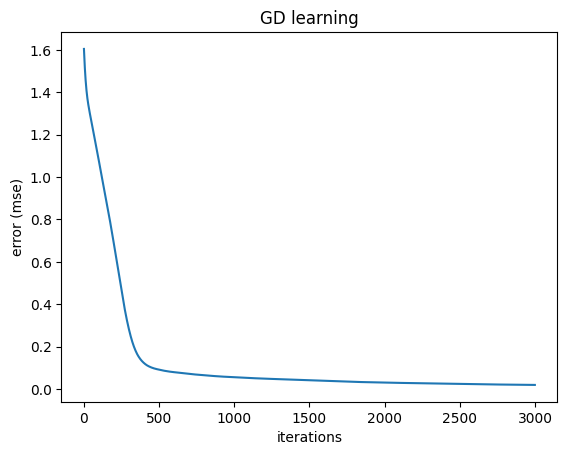

In [11]:
plt.figure(3)
plt.plot(range(no_epochs), train_loss_)
plt.xlabel('iterations')
plt.ylabel('error (mse)')
plt.title('GD learning')
plt.show()

In [12]:
# Print final errors
print('train m.s.e. = %3.3f'%(train_loss_[-1]))

train m.s.e. = 0.020


In [13]:
# Find network predictions
pred = model(torch.tensor(X, device=device))

## Plot targets and predicted points

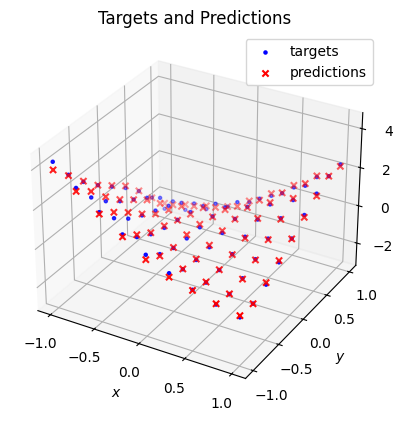

In [14]:
fig = plt.figure(4)
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], color='blue', marker='.', label='targets')
ax.scatter(X[:,0], X[:,1], pred[:,0].cpu().detach().numpy(), color='red', marker='x', label='predictions')
ax.set_title('Targets and Predictions')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel(r'$\phi$')
ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_zticks([-2, 0, 2, 4])
ax.legend()
plt.show()

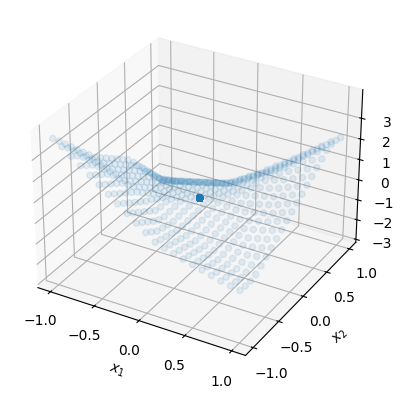

In [22]:
#print targets and predictions
fig = plt.figure(5)
ax = plt.axes(projection = '3d')
# plot_original = ax.scatter(X[:,0], X[:,1], Y[:,0], c='blue', label='targets')
# plot_pred = ax.scatter(X[:,0], X[:,1], pred[:,0].cpu().detach().numpy(), c='orange', label='predicted')
X1 = np.arange(-1, 1.001, 0.1).astype(np.float32)
X2 = np.arange(-1, 1.001, 0.1).astype(np.float32)
X1,X2 = np.meshgrid(X1,X2)
nX = np.size(X1)
XX = np.zeros((nX*nX, 2)).astype(np.float32)
p = 0
for i in np.arange(-1, 1.001, 0.1):
    for j in np.arange(-1, 1.001, 0.1):
        XX[p] = [i, j]
        p += 1
Z = model(torch.tensor(XX, device=device))
regression_plane = ax.scatter(XX[:,0], XX[:,1], Z[:,0].cpu().detach().numpy(), alpha = 0.1)
ax.set_zticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
# plt.legend()
plt.show()